In [1]:
import pandas as pd

# Load merged data
data = pd.read_csv('C:/Users/Sachin Gora/OneDrive/Desktop/project/data/cleaned_merged_data.csv')
print(data.head())


         date ticker                                              tweet  \
0  2020-01-02   AAPL  $aapl $300 calls first trade of 2020 congrats ...   
1  2020-01-02   AAPL  $aapl remember if you short every day one of t...   
2  2020-01-02   AAPL  $aapl called it the bear comment below makes m...   
3  2020-01-02     HD  $hd bought more at todays low she is turning s...   
4  2020-01-02   AAPL           apple is taking things up in 2020  $aapl   

       close  
0  75.087502  
1  75.087502  
2  75.087502  
3  75.087502  
4  75.087502  


In [2]:
forecast_data = data[['date', 'ticker', 'close']]
forecast_data['date'] = pd.to_datetime(forecast_data['date'])
forecast_data.set_index('date', inplace=True)
print(forecast_data.head())


           ticker      close
date                        
2020-01-02   AAPL  75.087502
2020-01-02   AAPL  75.087502
2020-01-02   AAPL  75.087502
2020-01-02     HD  75.087502
2020-01-02   AAPL  75.087502


C:\Users\Sachin Gora\AppData\Local\Temp\ipykernel_4312\3729223238.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast_data['date'] = pd.to_datetime(forecast_data['date'])


In [3]:
#Create subsets for each company (e.g., AAPL):
company_data = forecast_data[forecast_data['ticker'] == 'AAPL']
print(company_data.head())


           ticker      close
date                        
2020-01-02   AAPL  75.087502
2020-01-02   AAPL  75.087502
2020-01-02   AAPL  75.087502
2020-01-02   AAPL  75.087502
2020-01-02   AAPL  75.087502


In [4]:
pip install statsmodels


Note: you may need to restart the kernel to use updated packages.
  Obtaining dependency information for statsmodels from https://files.pythonhosted.org/packages/4b/e4/f9e96896278308e17dfd4f60a84826c48117674c980234ee38f59ab28a12/statsmodels-0.14.4-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for scipy!=1.9.2,>=1.8 from https://files.pythonhosted.org/packages/ea/c2/5ecadc5fcccefaece775feadcd795060adf5c3b29a883bff0e678cfe89af/scipy-1.14.1-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------------------------- ------------ 41.0/60.8 kB 393.8 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 404.3 kB/s eta 0:00:00
  Obtaining dependency information for patsy>=0.5.6 from https://files.pythonhosted.org/packages/87/2b/b50d3d08ea0fc419c18


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


c:\Users\Sachin Gora\OneDrive\Desktop\project\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Sachin Gora\OneDrive\Desktop\project\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Sachin Gora\OneDrive\Desktop\project\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Sachin Gora\OneDrive\Desktop\project\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so w

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 1603
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -3835.651
Date:                Sat, 07 Dec 2024   AIC                           7683.302
Time:                        06:31:13   BIC                           7715.576
Sample:                             0   HQIC                          7695.286
                               - 1603                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0171      0.039     -0.441      0.659      -0.093       0.059
ar.L2         -0.0114      0.027     -0.423      0.672      -0.064       0.041
ar.L3          0.0104      0.036      0.288      0.7

c:\Users\Sachin Gora\OneDrive\Desktop\project\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Sachin Gora\OneDrive\Desktop\project\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


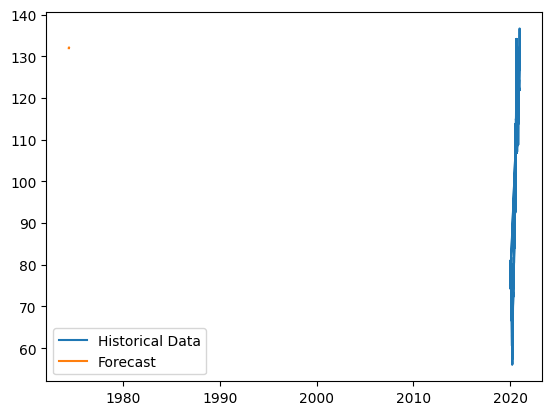

In [5]:
#Build and forecast using ARIMA:

from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Train ARIMA model
model = ARIMA(company_data['close'], order=(5, 1, 0))  # Example order
model_fit = model.fit()
print(model_fit.summary())

# Forecast for 1, 3, 7 days
forecast = model_fit.forecast(steps=7)
print(forecast)

# Plot forecast
plt.plot(company_data['close'], label='Historical Data')
plt.plot(forecast.index, forecast, label='Forecast')
plt.legend()
plt.show()


In [ ]:
#Save the forecasted values to a CSV file:
forecast.to_csv('C:/Users/Sachin Gora/OneDrive/Desktop/project/data/arima_forecast.csv', index=True)


In [8]:
# Time-Series Forecasting Using LSTM

!pip install tensorflow



  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/cf/24/271e77c22724f370c24c705f394b8035b4d27e4c2c6339f3f45ab9b8258e/tensorflow-2.18.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.18.0 from https://files.pythonhosted.org/packages/76/ad/fa6c508a15ff79cb5409294c293388e0999b7d480f84b65e4287277434fe/tensorflow_intel-2.18.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=24.3.25 from https://files.pythonhosted.org/packages/41/f0/7e988a019bc54b2db

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Sachin Gora\\OneDrive\\Desktop\\project\\venv\\Lib\\site-packages\\~umpy.libs\\libscipy_openblas64_-c16e4918366c6bc1f1cd71e28ca36fc0.dll'
Check the permissions.


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
!pip install scikit-learn


  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/17/1c/ccdd103cfcc9435a18819856fbbe0c20b8fa60bfc3343580de4be13f0668/scikit_learn-1.5.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for threadpoolctl>=3.1.0 from https://files.pythonhosted.org/packages/4b/2c/ffbf7a134b9ab11a67b0cf0726453cedd9c5043a4fe7a35d1cefa9a1bcfb/threadpoolctl-3.5.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB 640.0 kB/s eta 0:00:18
   ---------------------------------------- 0.1/11.0 MB 1.4 MB/s eta 0:00:08
    --------------------------------------- 0.3/11.0 MB 1.8 MB/s eta 0:00:06
    --------------------------------------- 0.3/11.0 MB 1.8 MB/s eta 0:00:06
   - -------------------------------------- 0.4/11.0 MB 1.8 MB/s eta 0:00:06
   - -------------------------------------- 0.4/11.0 MB 1.7 MB/s eta 0:00:07
   - -------------------------


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
#Normalize and reshape data for LSTM:


from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(company_data[['close']])

# Create sequences
def create_sequences(data, time_steps=5):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps, 0])
        y.append(data[i+time_steps, 0])
    return np.array(X), np.array(y)

time_steps = 5
X, y = create_sequences(scaled_data, time_steps)
X = X.reshape(X.shape[0], X.shape[1], 1)


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_steps, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))

# Compile and train the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, epochs=20, batch_size=32)

print("LSTM model trained successfully!")


Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.1745
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0057
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0036
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0027
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0021
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0037
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0028
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0025 
Epoch 9/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0019 
Epoch 10/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0026
Epoch 11/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0027 
Epoch 12/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0022
Epoch 13/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0028
Epoch 14/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0024
Epoch 15/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0030
Epoch 16/20
50/5

In [16]:
!pip install tensorflow


  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/cf/24/271e77c22724f370c24c705f394b8035b4d27e4c2c6339f3f45ab9b8258e/tensorflow-2.18.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow-2.18.0-cp311-cp311-win_amd64.whl.metadata (3.3 kB)
  Obtaining dependency information for tensorflow-intel==2.18.0 from https://files.pythonhosted.org/packages/76/ad/fa6c508a15ff79cb5409294c293388e0999b7d480f84b65e4287277434fe/tensorflow_intel-2.18.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow_intel-2.18.0-cp311-cp311-win_amd64.whl.metadata (4.9 kB)
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
#Predict future prices using the LSTM model:

predictions = model.predict(X[-7:])
predictions = scaler.inverse_transform(predictions)
print(predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
[[121.44078 ]
 [122.605934]
 [123.33865 ]
 [124.44471 ]
 [126.18892 ]
 [128.23163 ]
 [130.13976 ]]


In [20]:
#Save the LSTM forecasted values to a CSV file:

pd.DataFrame(predictions, columns=['forecast']).to_csv('C:/Users/Sachin Gora/OneDrive/Desktop/project/data/lstm_forecast.csv', index=False)


In [21]:
#Compare ARIMA and LSTM forecasts using metrics like RMSE and MAE:

from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate metrics
actual = company_data['close'][-7:].values
arima_rmse = np.sqrt(mean_squared_error(actual, forecast[:7]))
lstm_rmse = np.sqrt(mean_squared_error(actual, predictions.flatten()))

print(f"ARIMA RMSE: {arima_rmse}")
print(f"LSTM RMSE: {lstm_rmse}")


ARIMA RMSE: 4.429533673782648
LSTM RMSE: 4.707649759537878


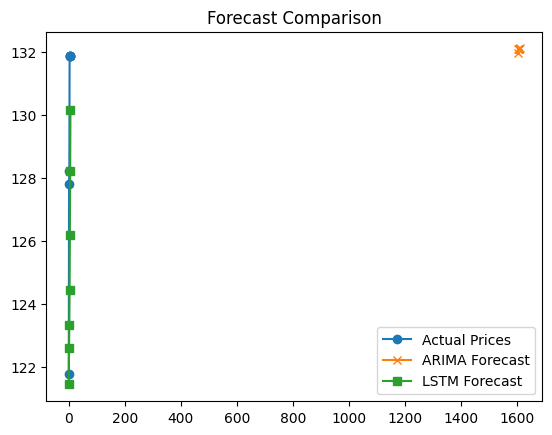

In [22]:
#Visualize ARIMA and LSTM forecasts against actual values:

import matplotlib.pyplot as plt

plt.plot(actual, label='Actual Prices', marker='o')
plt.plot(forecast[:7], label='ARIMA Forecast', marker='x')
plt.plot(predictions.flatten(), label='LSTM Forecast', marker='s')
plt.legend()
plt.title('Forecast Comparison')
plt.show()
